In [2]:
import pandas as pd
import numpy as np

In [3]:
# Load the data into DataFrames
train_users = pd.read_csv('./data/train_users_2.csv')
test_users = pd.read_csv('./data/test_users.csv')

In [4]:
# Inspect data 
len(train_users.id.unique()), len(test_users.id.unique()), train_users.shape, test_users.shape

(213451, 62096, (213451, 16), (62096, 15))

In [5]:
train_users.isnull().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

In [6]:
test_users.isnull().sum()

id                             0
date_account_created           0
timestamp_first_active         0
date_first_booking         62096
gender                         0
age                        28876
signup_method                  0
signup_flow                    0
language                       0
affiliate_channel              0
affiliate_provider             0
first_affiliate_tracked       20
signup_app                     0
first_device_type              0
first_browser                  0
dtype: int64

In [7]:
train_users.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [8]:
# Merge train and test users
users = pd.concat((train_users, test_users), axis=0)
users.head()

,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,date_first_booking,first_affiliate_tracked,first_browser,first_device_type,gender,id,language,signup_app,signup_flow,signup_method,timestamp_first_active
0,direct,direct,NaN,NDF,2010-06-28,NaN,untracked,Chrome,Mac Desktop,-unknown-,gxn3p5htnn,en,Web,0,facebook,20090319043255
1,seo,google,38,NDF,2011-05-25,NaN,untracked,Chrome,Mac Desktop,MALE,820tgsjxq7,en,Web,0,facebook,20090523174809
2,direct,direct,56,US,2010-09-28,2010-08-02,untracked,IE,Windows Desktop,FEMALE,4ft3gnwmtx,en,Web,3,basic,20090609231247
3,direct,direct,42,other,2011-12-05,2012-09-08,untracked,Firefox,Mac Desktop,FEMALE,bjjt8pjhuk,en,Web,0,facebook,20091031060129
4,direct,direct,41,US,2010-09-14,2010-02-18,untracked,Chrome,Mac Desktop,-unknown-,87mebub9p4,en,Web,0,basic,20091208061105


In [9]:
users.columns, users.shape

(Index([u'affiliate_channel', u'affiliate_provider', u'age',
        u'country_destination', u'date_account_created', u'date_first_booking',
        u'first_affiliate_tracked', u'first_browser', u'first_device_type',
        u'gender', u'id', u'language', u'signup_app', u'signup_flow',
        u'signup_method', u'timestamp_first_active'],
       dtype='object'), (275547, 16))

In [10]:
# Replace null in Gender field
users.gender.replace('-unknown-', np.nan, inplace=True)

In [11]:
users.timestamp_first_active.head()

0    20090319043255
1    20090523174809
2    20090609231247
3    20091031060129
4    20091208061105
Name: timestamp_first_active, dtype: int64

In [12]:
# Change Dates columns to Python Date format
users['date_account_created'] = pd.to_datetime(users['date_account_created'], format='%Y-%m-%d')
users['timestamp_first_active'] = pd.to_datetime(users['timestamp_first_active'], format='%Y%m%d%H%M%S')
#users['date_account_created'].fillna(df_all.timestamp_first_active, inplace=True)

In [13]:
users.isnull().sum()

affiliate_channel               0
affiliate_provider              0
age                        116866
country_destination         62096
date_account_created            0
date_first_booking         186639
first_affiliate_tracked      6085
first_browser                   0
first_device_type               0
gender                     129480
id                              0
language                        0
signup_app                      0
signup_flow                     0
signup_method                   0
timestamp_first_active          0
dtype: int64

In [14]:
# Inspect Age outliers and remove the outliers
print len(users[users['age'] > 90])
print len(users[users['age'] < 15])
print len(users[users['age'].isnull()])

2928
59
116866


In [15]:
users.loc[users['age'] > 90,'age'] = np.NaN

In [16]:
users.loc[users['age'] < 15,'age'] = np.NaN

In [17]:
print len(users[users['age'] > 90])
print len(users[users['age'] < 15])
print len(users[users['age'].isnull()])

0
0
119853


In [18]:
users.fillna({'age':-1}, inplace=True)

,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,date_first_booking,first_affiliate_tracked,first_browser,first_device_type,gender,id,language,signup_app,signup_flow,signup_method,timestamp_first_active
0,direct,direct,-1,NDF,2010-06-28,NaN,untracked,Chrome,Mac Desktop,NaN,gxn3p5htnn,en,Web,0,facebook,2009-03-19 04:32:55
1,seo,google,38,NDF,2011-05-25,NaN,untracked,Chrome,Mac Desktop,MALE,820tgsjxq7,en,Web,0,facebook,2009-05-23 17:48:09
2,direct,direct,56,US,2010-09-28,2010-08-02,untracked,IE,Windows Desktop,FEMALE,4ft3gnwmtx,en,Web,3,basic,2009-06-09 23:12:47
3,direct,direct,42,other,2011-12-05,2012-09-08,untracked,Firefox,Mac Desktop,FEMALE,bjjt8pjhuk,en,Web,0,facebook,2009-10-31 06:01:29
4,direct,direct,41,US,2010-09-14,2010-02-18,untracked,Chrome,Mac Desktop,NaN,87mebub9p4,en,Web,0,basic,2009-12-08 06:11:05
5,other,other,-1,US,2010-01-01,2010-01-02,omg,Chrome,Mac Desktop,NaN,osr2jwljor,en,Web,0,basic,2010-01-01 21:56:19
6,other,craigslist,46,US,2010-01-02,2010-01-05,untracked,Safari,Mac Desktop,FEMALE,lsw9q7uk0j,en,Web,0,basic,2010-01-02 01:25:58
7,direct,direct,47,US,2010-01-03,2010-01-13,omg,Safari,Mac Desktop,FEMALE,0d01nltbrs,en,Web,0,basic,2010-01-03 19:19:05
8,other,craigslist,50,US,2010-01-04,2010-07-29,untracked,Safari,Mac Desktop,FEMALE,a1vcnhxeij,en,Web,0,basic,2010-01-04 00:42:11
9,other,craigslist,46,US,2010-01-04,2010-01-04,omg,Firefox,Mac Desktop,NaN,6uh8zyj2gn,en,Web,0,basic,2010-01-04 02:37:58


In [19]:
users.head()

,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,date_first_booking,first_affiliate_tracked,first_browser,first_device_type,gender,id,language,signup_app,signup_flow,signup_method,timestamp_first_active
0,direct,direct,-1,NDF,2010-06-28,NaN,untracked,Chrome,Mac Desktop,NaN,gxn3p5htnn,en,Web,0,facebook,2009-03-19 04:32:55
1,seo,google,38,NDF,2011-05-25,NaN,untracked,Chrome,Mac Desktop,MALE,820tgsjxq7,en,Web,0,facebook,2009-05-23 17:48:09
2,direct,direct,56,US,2010-09-28,2010-08-02,untracked,IE,Windows Desktop,FEMALE,4ft3gnwmtx,en,Web,3,basic,2009-06-09 23:12:47
3,direct,direct,42,other,2011-12-05,2012-09-08,untracked,Firefox,Mac Desktop,FEMALE,bjjt8pjhuk,en,Web,0,facebook,2009-10-31 06:01:29
4,direct,direct,41,US,2010-09-14,2010-02-18,untracked,Chrome,Mac Desktop,NaN,87mebub9p4,en,Web,0,basic,2009-12-08 06:11:05


In [20]:
# Extract Date Features
import datetime as dt
users['day_account_created'] = users['date_account_created'].dt.weekday
users['month_account_created'] = users['date_account_created'].dt.month
users['quarter_account_created'] = users['date_account_created'].dt.quarter
users['year_account_created'] = users['date_account_created'].dt.year
users['hour_first_active'] = users['timestamp_first_active'].dt.hour
users['day_first_active'] = users['timestamp_first_active'].dt.weekday
users['month_first_active'] = users['timestamp_first_active'].dt.month
users['quarter_first_active'] = users['timestamp_first_active'].dt.quarter
users['year_first_active'] = users['timestamp_first_active'].dt.year
users['created_less_active'] = (users['date_account_created'] - users['timestamp_first_active']).dt.days

In [21]:
users.shape

(275547, 26)

In [22]:
users.columns

Index([u'affiliate_channel', u'affiliate_provider', u'age',
       u'country_destination', u'date_account_created', u'date_first_booking',
       u'first_affiliate_tracked', u'first_browser', u'first_device_type',
       u'gender', u'id', u'language', u'signup_app', u'signup_flow',
       u'signup_method', u'timestamp_first_active', u'day_account_created',
       u'month_account_created', u'quarter_account_created',
       u'year_account_created', u'hour_first_active', u'day_first_active',
       u'month_first_active', u'quarter_first_active', u'year_first_active',
       u'created_less_active'],
      dtype='object')

In [23]:
users.isnull().sum()

affiliate_channel               0
affiliate_provider              0
age                             0
country_destination         62096
date_account_created            0
date_first_booking         186639
first_affiliate_tracked      6085
first_browser                   0
first_device_type               0
gender                     129480
id                              0
language                        0
signup_app                      0
signup_flow                     0
signup_method                   0
timestamp_first_active          0
day_account_created             0
month_account_created           0
quarter_account_created         0
year_account_created            0
hour_first_active               0
day_first_active                0
month_first_active              0
quarter_first_active            0
year_first_active               0
created_less_active             0
dtype: int64

In [24]:
users.ix[0,:]

,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,date_first_booking,first_affiliate_tracked,first_browser,first_device_type,gender,...,day_account_created,month_account_created,quarter_account_created,year_account_created,hour_first_active,day_first_active,month_first_active,quarter_first_active,year_first_active,created_less_active
0,direct,direct,-1,NDF,2010-06-28,NaN,untracked,Chrome,Mac Desktop,NaN,...,0,6,2,2010,4,3,3,1,2009,465
0,direct,direct,35,NaN,2014-07-01,NaN,untracked,Mobile Safari,iPhone,FEMALE,...,1,7,3,2014,0,1,7,3,2014,-1


In [25]:
len(users.id.unique())

275547

In [26]:
t_users = users.copy()

In [27]:
t_users = t_users.set_index('id')

In [28]:
t_users.columns.tolist()

['affiliate_channel',
 'affiliate_provider',
 'age',
 'country_destination',
 'date_account_created',
 'date_first_booking',
 'first_affiliate_tracked',
 'first_browser',
 'first_device_type',
 'gender',
 'language',
 'signup_app',
 'signup_flow',
 'signup_method',
 'timestamp_first_active',
 'day_account_created',
 'month_account_created',
 'quarter_account_created',
 'year_account_created',
 'hour_first_active',
 'day_first_active',
 'month_first_active',
 'quarter_first_active',
 'year_first_active',
 'created_less_active']

In [29]:
for col in t_users.columns:
    print col, t_users[col].dtype
    #print t_users[col].value_counts()
print len(t_users.columns)

affiliate_channel object
affiliate_provider object
age float64
country_destination object
date_account_created datetime64[ns]
date_first_booking object
first_affiliate_tracked object
first_browser object
first_device_type object
gender object
language object
signup_app object
signup_flow int64
signup_method object
timestamp_first_active datetime64[ns]
day_account_created int64
month_account_created int64
quarter_account_created int64
year_account_created int64
hour_first_active int64
day_first_active int64
month_first_active int64
quarter_first_active int64
year_first_active int64
created_less_active int64
25


In [30]:
cat_features = ['affiliate_channel',
 'affiliate_provider',
 'first_affiliate_tracked',
 'first_browser',
 'first_device_type',
 'gender',
 'language',
 'signup_app',
 'signup_flow',
 'signup_method']
num_features = ['day_account_created',
 'month_account_created',
 'quarter_account_created',
 'year_account_created',
 'hour_first_active',
 'day_first_active',
 'month_first_active',
 'quarter_first_active',
 'year_first_active',
 'created_less_active']
target = ['country_destination']

In [31]:
encode_users = pd.get_dummies(t_users[cat_features])

In [32]:
encode_users.shape, t_users[num_features].shape

((275547, 135), (275547, 10))

In [33]:
df_users = pd.merge(t_users[num_features], encode_users, how='inner', left_index=True, right_index=True)

In [34]:
df_users.shape

(275547, 145)

In [35]:
df_users.head()

,day_account_created,month_account_created,quarter_account_created,year_account_created,hour_first_active,day_first_active,month_first_active,quarter_first_active,year_first_active,created_less_active,...,language_tr,language_zh,signup_app_Android,signup_app_Moweb,signup_app_Web,signup_app_iOS,signup_method_basic,signup_method_facebook,signup_method_google,signup_method_weibo
id,,,,,,,,,,,,,,,,,,,,,
gxn3p5htnn,0,6,2,2010,4,3,3,1,2009,465,...,0,0,0,0,1,0,0,1,0,0
820tgsjxq7,2,5,2,2011,17,5,5,2,2009,731,...,0,0,0,0,1,0,0,1,0,0
4ft3gnwmtx,1,9,3,2010,23,1,6,2,2009,475,...,0,0,0,0,1,0,1,0,0,0
bjjt8pjhuk,0,12,4,2011,6,5,10,4,2009,764,...,0,0,0,0,1,0,0,1,0,0
87mebub9p4,1,9,3,2010,6,1,12,4,2009,279,...,0,0,0,0,1,0,1,0,0,0


In [36]:
# Join/Merge with session data
user_devices = pd.read_csv('./data/user_devices.csv')
user_session = pd.read_csv('./data/user_session.csv')

In [37]:
user_devices.shape, user_session.shape, df_users.shape

((135483, 15), (135478, 11), (275547, 145))

In [38]:
user_devices.columns

Index([u'user_id', u'-unknown-', u'Android App Unknown Phone/Tablet',
       u'Android Phone', u'Blackberry', u'Chromebook', u'Linux Desktop',
       u'Mac Desktop', u'Opera Phone', u'Tablet', u'Windows Desktop',
       u'Windows Phone', u'iPad Tablet', u'iPhone', u'iPodtouch'],
      dtype='object')

In [39]:
df_users = df_users.reset_index()

In [40]:
df_users.head()

,id,day_account_created,month_account_created,quarter_account_created,year_account_created,hour_first_active,day_first_active,month_first_active,quarter_first_active,year_first_active,...,language_tr,language_zh,signup_app_Android,signup_app_Moweb,signup_app_Web,signup_app_iOS,signup_method_basic,signup_method_facebook,signup_method_google,signup_method_weibo
0,gxn3p5htnn,0,6,2,2010,4,3,3,1,2009,...,0,0,0,0,1,0,0,1,0,0
1,820tgsjxq7,2,5,2,2011,17,5,5,2,2009,...,0,0,0,0,1,0,0,1,0,0
2,4ft3gnwmtx,1,9,3,2010,23,1,6,2,2009,...,0,0,0,0,1,0,1,0,0,0
3,bjjt8pjhuk,0,12,4,2011,6,5,10,4,2009,...,0,0,0,0,1,0,0,1,0,0
4,87mebub9p4,1,9,3,2010,6,1,12,4,2009,...,0,0,0,0,1,0,1,0,0,0


In [41]:
all_users = pd.merge(df_users, user_devices, how='left', left_on='id', right_on='user_id')

In [42]:
all_users.shape

(275547, 161)

In [43]:
all_users = pd.merge(all_users, user_session, how='left', left_on='id', right_on='user_id')

In [44]:
all_users.shape

(275547, 172)

In [45]:
all_users.head()

,id,day_account_created,month_account_created,quarter_account_created,year_account_created,hour_first_active,day_first_active,month_first_active,quarter_first_active,year_first_active,...,-unknown-_y,booking_request,booking_response,click,data,message_post,modify,partner_callback,submit,view
0,gxn3p5htnn,0,6,2,2010,4,3,3,1,2009,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,820tgsjxq7,2,5,2,2011,17,5,5,2,2009,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4ft3gnwmtx,1,9,3,2010,23,1,6,2,2009,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,bjjt8pjhuk,0,12,4,2011,6,5,10,4,2009,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,87mebub9p4,1,9,3,2010,6,1,12,4,2009,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
destination = t_users['country_destination'].reset_index()

In [47]:
destination.head()

,id,country_destination
0,gxn3p5htnn,NDF
1,820tgsjxq7,NDF
2,4ft3gnwmtx,US
3,bjjt8pjhuk,other
4,87mebub9p4,US


In [48]:
destination.shape, len(destination.id.unique())

((275547, 2), 275547)

In [49]:
all_users = pd.merge(all_users, destination, how='inner', on='id')

In [50]:
all_users.shape

(275547, 173)

In [51]:
all_users = all_users.drop(['user_id_x','user_id_y'], axis=1)

In [52]:
all_users.shape

(275547, 171)

In [53]:
all_users.isnull().sum()

id                                             0
day_account_created                            0
month_account_created                          0
quarter_account_created                        0
year_account_created                           0
hour_first_active                              0
day_first_active                               0
month_first_active                             0
quarter_first_active                           0
year_first_active                              0
created_less_active                            0
signup_flow                                    0
affiliate_channel_api                          0
affiliate_channel_content                      0
affiliate_channel_direct                       0
affiliate_channel_other                        0
affiliate_channel_remarketing                  0
affiliate_channel_sem-brand                    0
affiliate_channel_sem-non-brand                0
affiliate_channel_seo                          0
affiliate_provider_b

In [54]:
# Split train and test data
df_test = all_users[all_users['country_destination'].isnull()]

In [55]:
df_test.shape

(62096, 171)

In [56]:
df_test.isnull().sum()

id                                            0
day_account_created                           0
month_account_created                         0
quarter_account_created                       0
year_account_created                          0
hour_first_active                             0
day_first_active                              0
month_first_active                            0
quarter_first_active                          0
year_first_active                             0
created_less_active                           0
signup_flow                                   0
affiliate_channel_api                         0
affiliate_channel_content                     0
affiliate_channel_direct                      0
affiliate_channel_other                       0
affiliate_channel_remarketing                 0
affiliate_channel_sem-brand                   0
affiliate_channel_sem-non-brand               0
affiliate_channel_seo                         0
affiliate_provider_baidu                

In [57]:
df_train = all_users[all_users['country_destination'].isnull()==False]

In [58]:
df_train.shape

(213451, 171)

In [59]:
df_train = df_train.fillna(0)
df_test = df_test.fillna(0)

In [67]:
df_train.to_csv('./data/train_features.csv',index=False)
df_test.to_csv('./data/test_features.csv',index=False)

In [61]:
from sklearn.preprocessing import LabelEncoder
labels = df_train['country_destination']
le = LabelEncoder()
y = le.fit_transform(labels)

In [62]:
X = df_train.drop('country_destination', axis=1, inplace=False)

In [63]:
X.shape, y.shape

((213451, 170), (213451,))

In [64]:
idtrain = df_train['id']

In [65]:
X = X.drop('id', axis=1, inplace=False)

In [66]:
X.shape

(213451, 169)

In [67]:
# Model 1: Random Forest Classification
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [72]:
#model1 = RandomForestClassifier(n_estimators=10)
model1 = RandomForestClassifier(n_estimators=25)
scores = cross_val_score(model1, X, y, cv=5)

In [73]:
scores

array([ 0.13113948,  0.15107863,  0.15274882,  0.28602886,  0.58996345])

In [74]:
model2 = RandomForestClassifier(n_estimators=25)
model2.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [75]:
model2.score(X, y)

0.95732978529030077

In [137]:
# Model 2
# Grid Search - Used to find best combination of parameters
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search


In [138]:
#XGB_model = xgb.XGBClassifier(objective='multi:softprob', subsample=0.5, colsample_bytree=0.5, seed=0)
#param_grid = {'max_depth': [3, 4, 5], 'learning_rate': [0.1, 0.3], 'n_estimators': [25, 50]}
#model = GridSearchCV(estimator=XGB_model, param_grid=param_grid, scoring='accuracy', verbose=10, n_jobs=1, iid=True, refit=True, cv=3)

XGB_model = xgb.XGBClassifier(objective='multi:softprob', subsample=0.5, colsample_bytree=0.5, seed=0)
param_grid = {'max_depth': [3], 'learning_rate': [0.1], 'n_estimators': [25, 50]}
model = GridSearchCV(estimator=XGB_model, param_grid=param_grid, scoring='accuracy', verbose=10, n_jobs=1, iid=True, refit=True, cv=3)

In [139]:
model.fit(X, y)
print("Best score: %0.3f" % model.best_score_)
print("Best parameters set:")
best_parameters = model.best_estimator_.get_params()
for param_name in sorted(param_grid.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] n_estimators=25, learning_rate=0.1, max_depth=3 .................
[CV]  n_estimators=25, learning_rate=0.1, max_depth=3, score=0.114372 -  39.1s
[CV] n_estimators=25, learning_rate=0.1, max_depth=3 .................
[CV]  n_estimators=25, learning_rate=0.1, max_depth=3, score=0.292997 -  39.0s
[CV] n_estimators=25, learning_rate=0.1, max_depth=3 .................
[CV]  n_estimators=25, learning_rate=0.1, max_depth=3, score=0.583687 -  37.2s
[CV] n_estimators=50, learning_rate=0.1, max_depth=3 .................
[CV]  n_estimators=50, learning_rate=0.1, max_depth=3, score=0.081078 - 1.3min

[Parallel(n_jobs=1)]: Done   1 tasks       | elapsed:   39.1s
[Parallel(n_jobs=1)]: Done   4 tasks       | elapsed:  3.2min



[CV] n_estimators=50, learning_rate=0.1, max_depth=3 .................
[CV]  n_estimators=50, learning_rate=0.1, max_depth=3, score=0.272898 - 1.3min
[CV] n_estimators=50, learning_rate=0.1, max_depth=3 .................
[CV]  n_estimators=50, learning_rate=0.1, max_depth=3, score=0.583167 - 1.2min
Best score: 0.330
Best parameters set:
	learning_rate: 0.1
	max_depth: 3
	n_estimators: 25


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  5.8min finished


In [140]:
#Best score: 0.330
#Best parameters set:
#learning_rate: 0.1
#max_depth: 3
#n_estimators: 25

In [146]:
final_model = XGBClassifier(
        learning_rate =0.1,
        n_estimators=25,
        max_depth=3,
        objective='multi:softprob', 
        subsample=0.5, 
        colsample_bytree=0.5, 
        seed=0)
final_model.fit(X,y)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.5,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=25, nthread=-1,
       objective='multi:softprob', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.5)

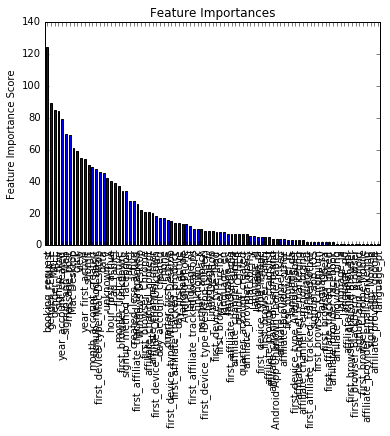

In [147]:
import matplotlib.pyplot as plt
%matplotlib inline
feat_imp = pd.Series(final_model.booster().get_fscore()).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

In [149]:
feat_imp

booking_request                          124
gender_FEMALE                             89
gender_MALE                               85
signup_flow                               84
year_account_created                      79
signup_app_Web                            70
message_post                              69
Mac Desktop                               61
click                                     59
view                                      55
year_first_active                         54
submit                                    50
month_account_created                     49
signup_method_basic                       48
first_device_type_Mac Desktop             46
data                                      45
-unknown-_y                               42
hour_first_active                         40
iPad Tablet                               39
month_first_active                        37
first_browser_-unknown-                   34
signup_method_facebook                    34
Tablet    

In [83]:
df_test.shape, df_train.shape, X.shape

((62096, 171), (213451, 171), (213451, 169))

In [87]:
df_test = df_test.drop('country_destination', axis=1, inplace=False)

In [88]:
id_test = df_test['id']

In [89]:
X_test = df_test.drop('id', axis=1, inplace=False)

In [90]:
X_test.shape

(62096, 169)

In [91]:
# Make predictions
y_pred = model.predict_proba(X_test)

In [96]:
y_pred.shape

(62096, 12)

In [98]:
y_pred[0]

array([ 0.0189902 ,  0.0204197 ,  0.01949647,  0.02277616,  0.02737292,
        0.02184765,  0.02429677,  0.57817441,  0.01953008,  0.01816849,
        0.18466853,  0.04425857], dtype=float32)

In [99]:
np.argsort(y_pred[0])

array([ 9,  0,  2,  8,  1,  5,  3,  6,  4, 11, 10,  7])

In [100]:
np.argsort(y_pred[0])[::-1]

array([ 7, 10, 11,  4,  6,  3,  5,  1,  8,  2,  0,  9])

In [101]:
le.inverse_transform(np.argsort(y_pred[0])[::-1])

array(['NDF', 'US', 'other', 'FR', 'IT', 'ES', 'GB', 'CA', 'NL', 'DE',
       'AU', 'PT'], dtype=object)

In [105]:
id_test = id_test.reset_index()

In [106]:
id_test.head()

,index,id
0,213451,5uwns89zht
1,213452,jtl0dijy2j
2,213453,xx0ulgorjt
3,213454,6c6puo6ix0
4,213455,czqhjk3yfe


In [107]:
ids_test = id_test.id.values

In [108]:
#Taking the 5 classes with highest probabilities
ids = []  #list of ids
cts = []  #list of countries
for i in range(len(ids_test)):
    idx = ids_test[i]
    ids += [idx] * 5
    cts += le.inverse_transform(np.argsort(y_pred[i])[::-1])[:5].tolist()

In [112]:
len(ids), len(cts), ids[:10], cts[:10]

(310480,
 310480,
 ['5uwns89zht',
  '5uwns89zht',
  '5uwns89zht',
  '5uwns89zht',
  '5uwns89zht',
  'jtl0dijy2j',
  'jtl0dijy2j',
  'jtl0dijy2j',
  'jtl0dijy2j',
  'jtl0dijy2j'],
 ['NDF', 'US', 'other', 'FR', 'IT', 'NDF', 'US', 'other', 'FR', 'IT'])

In [113]:
np.column_stack((ids,cts))

array([['5uwns89zht', 'NDF'],
       ['5uwns89zht', 'US'],
       ['5uwns89zht', 'other'],
       ..., 
       ['9uqfg8txu3', 'other'],
       ['9uqfg8txu3', 'FR'],
       ['9uqfg8txu3', 'IT']], 
      dtype='|S10')

In [114]:
#Generate submission
print("Outputting final results...")
sub = pd.DataFrame(np.column_stack((ids, cts)), columns=['id', 'country'])
sub.to_csv('./data/submission-2016-10-21.csv', index=False)

Outputting final results...


In [ ]:
# 1. Combine train and test users data
# 2. Convert gender to NA
# 3. Convert date/timestamp to Python datetime
# 4. Drop date_first_booking
# 5. Handle age outlier 
# 6. Date feature extraction
# 7. One-hot-encoding
# 8. Join with session data
# 9. Clean other missing values